 =============================================================
  ##               TRABAJO FINAL INTEGRADOR       
  
  ###                  ANALISIS DE DATOS
  ###                 CRIMENES DE CHICAGO
 =============================================================


**ALUMNOS:**
- Mauro Fabian Barquinero
- Martin Errazquin
---

Importar librerias

In [432]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Carga de datos

In [433]:
#  Cargar el dataset
file_path = "C:\CEIA\Analisis_de_datos\Trabajo Final\Crimes_-_2024_20250315.csv"
df = pd.read_csv(file_path)

<>:2: SyntaxWarning: invalid escape sequence '\C'
<>:2: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\2174163630.py:2: SyntaxWarning: invalid escape sequence '\C'
  file_path = "C:\CEIA\Analisis_de_datos\Trabajo Final\Crimes_-_2024_20250315.csv"


# An√°lisis de la Estructura del Dataset

In [434]:
# Se explora la estructura del dataset
print("\nüîπ Primeras filas del dataset")
df.head()


üîπ Primeras filas del dataset


ID Case Number                    Date  \
0  13709672    JJ101940  12/31/2024 11:58:00 PM   
1  13707925    JJ100089  12/31/2024 11:56:00 PM   
2  13708038    JJ100035  12/31/2024 11:55:00 PM   
3  13709164    JJ101392  12/31/2024 11:53:00 PM   
4  13707823    JJ100020  12/31/2024 11:50:00 PM   

                                 Block  IUCR       Primary Type  \
0                      014XX E 68TH ST  1310    CRIMINAL DAMAGE   
1  047XX S DR MARTIN LUTHER KING JR DR  1365  CRIMINAL TRESPASS   
2                   077XX S CICERO AVE  0498            BATTERY   
3                066XX S GREENWOOD AVE  1320    CRIMINAL DAMAGE   
4                   012XX N MENARD AVE  0460            BATTERY   

                                         Description Location Description  \
0                                        TO PROPERTY            APARTMENT   
1                                       TO RESIDENCE            APARTMENT   
2  AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...        HOTEL / MOTEL   
3                                         TO VEHICLE               STREET   
4                                             SIMPLE             SIDEWALK   

   Arrest  Domestic  ...  Ward  Community Area  FBI Code  X Coordinate  \
0   False     False  ...     5            43.0        14     1186817.0   
1    True      True  ...     3            38.0        26     1179661.0   
2   False      True  ...    18            70.0       04B     1145740.0   
3   False     False  ...    20            42.0        14     1184362.0   
4   False     False  ...    29            25.0       08B     1137458.0   

  Y Coordinate  Year              Updated On   Latitude  Longitude  \
0    1860189.0  2024  01/08/2025 03:42:09 PM  41.771470 -87.590742   
1    1873623.0  2024  01/08/2025 03:42:09 PM  41.808501 -87.616563   
2    1853048.0  2024  01/08/2025 03:42:09 PM  41.752749 -87.741498   
3    1861188.0  2024  01/08/2025 03:42:09 PM  41.774269 -87.599710   
4    1907694.0  2024  01/08/2025 03:42:09 PM  41.902858 -87.770537   

                             Location  
0   POINT (-87.59074212 41.771470188)  
1  POINT (-87.616562762 41.808500903)  
2  POINT (-87.741497836 41.752748627)  
3  POINT (-87.599709962 41.774269351)  
4  POINT (-87.770536741 41.902858242)  

[5 rows x 22 columns]

In [435]:
print("\nüîπ Informacion general del dataset")
df.info()


üîπ Informacion general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257668 entries, 0 to 257667
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    257668 non-null  int64  
 1   Case Number           257668 non-null  object 
 2   Date                  257668 non-null  object 
 3   Block                 257668 non-null  object 
 4   IUCR                  257668 non-null  object 
 5   Primary Type          257668 non-null  object 
 6   Description           257668 non-null  object 
 7   Location Description  256659 non-null  object 
 8   Arrest                257668 non-null  bool   
 9   Domestic              257668 non-null  bool   
 10  Beat                  257668 non-null  int64  
 11  District              257668 non-null  int64  
 12  Ward                  257668 non-null  int64  
 13  Community Area        257666 non-null  float64
 14  FBI Code      

In [436]:
print("\n üîπ Cantidad de filas y columnas", df.shape)


 üîπ Cantidad de filas y columnas (257668, 22)


In [437]:
print("\nüîπ Nombres de las columnas en el dataset:")
df.columns


üîπ Nombres de las columnas en el dataset:


Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [ ]:
# Se listan los distritos en orden
distritos_unicos = df["District"].dropna().unique()
distritos_df = pd.DataFrame({"Distrito": sorted(distritos_unicos)})
print("\n Distritos: ")
distritos_df


 Distritos: 


Distrito
0          1
1          2
2          3
3          4
4          5
5          6
6          7
7          8
8          9
9         10
10        11
11        12
12        14
13        15
14        16
15        17
16        18
17        19
18        20
19        22
20        24
21        25
22        31

# Limpieza de Datos

In [ ]:
## Lista de columnas que no son √∫tiles para el an√°lisis
'''
ID: Es solo un identificador √∫nico, no aporta informaci√≥n √∫til
Case Number: Es solo un n√∫mero de referencia para la polic√≠a
Block: Muestra direcciones parcialmente censuradas; no permite un an√°lisis geoespacial preciso.
IUCR: Un c√≥digo num√©rico que solo sirve como referencia interna.
FBI Code: Solo clasifica cr√≠menes seg√∫n el sistema del FBI, pero no es √∫til para tendencias
'''
columnas_a_eliminar = ["ID", "Case Number", "Block", "IUCR", "FBI Code"] 
df = df.drop(columns=columnas_a_eliminar)

# Verificar que las columnas fueron eliminadas
print("\nüîπ Columnas despu√©s de la eliminaci√≥n:", df.columns)
print(df.head())

print("\nüîπ Valores nulos en cada columna:")
print(df.isnull().sum())

df.drop_duplicates(inplace=True)
print("\n‚úÖ Duplicados eliminados.")

# Rellenar valores nulos con espacios en blanco
df.fillna(" ", inplace=True)
print("\n‚úÖLos valores nulos se reemplazaron satisfactoriamente")

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower()
print("\n‚úÖ La normalizacion de columnas ha sido satisfactoria.")

Columnas despu√©s de la eliminaci√≥n: Index(['Date', 'Primary Type', 'Description', 'Location Description', 'Arrest',
       'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')
                     Date       Primary Type  \
0  12/31/2024 11:58:00 PM    CRIMINAL DAMAGE   
1  12/31/2024 11:56:00 PM  CRIMINAL TRESPASS   
2  12/31/2024 11:55:00 PM            BATTERY   
3  12/31/2024 11:53:00 PM    CRIMINAL DAMAGE   
4  12/31/2024 11:50:00 PM            BATTERY   

                                         Description Location Description  \
0                                        TO PROPERTY            APARTMENT   
1                                       TO RESIDENCE            APARTMENT   
2  AGG. DOMESTIC BATTERY - HANDS, FISTS, FEET, SE...        HOTEL / MOTEL   
3                                         TO VEHICLE               STREET   
4              

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\195739840.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value ' ' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna(" ", inplace=True)


# Analisis Estadistico Descriptivo

In [440]:
# Tendencia central
print("\nüîπ Media (valor promedio)")
media =df.mean(numeric_only=True)
print(media)

print("\nüîπ Mediana (Valor central)")
mediana =df.median(numeric_only=True)
print(mediana)


üîπ Media (valor promedio)
arrest         0.136823
domestic       0.184152
beat        1156.838371
district      11.338484
ward          23.182057
year        2024.000000
dtype: float64

üîπ Mediana (Valor central)
arrest         0.0
domestic       0.0
beat        1034.0
district      10.0
ward          23.0
year        2024.0
dtype: float64



üîπ Moda (Valor mas frencuente)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\2971471791.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_tipos_crimen.values, y=conteo_tipos_crimen.index, palette="viridis")
C:\Users\Usuario\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


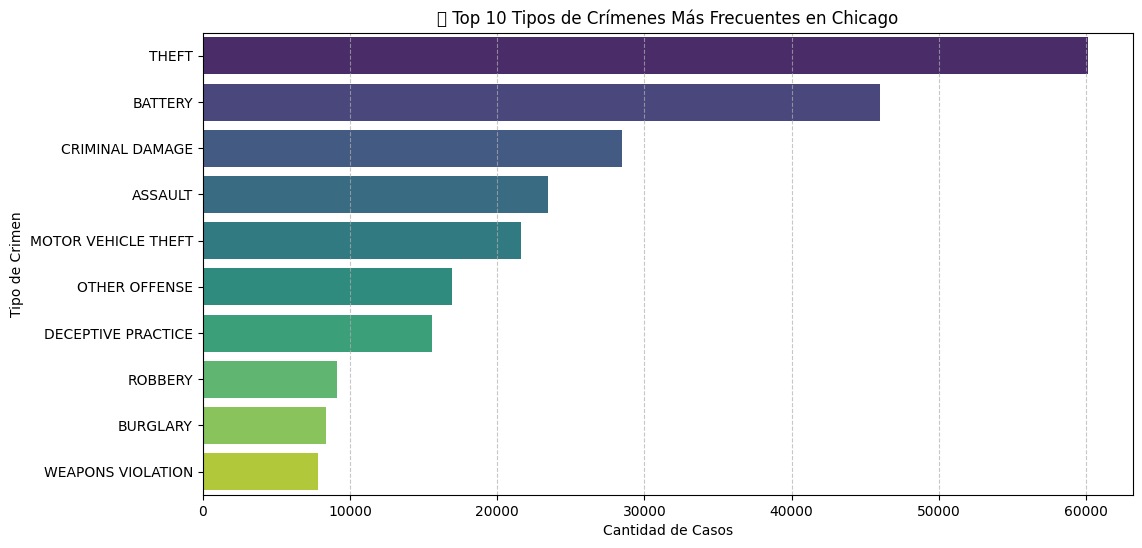


 El delito mas frecuente:  THEFT


In [ ]:
#======================================
# Moda - Top 10 cr√≠menes m√°s comunes
#======================================
print("\nüîπ Moda (Valor mas frencuente)")

# An√°lisis de Moda: Tipo de Crimen m√°s frecuente
tipo_crimen_mas_frecuente = df["primary type"].mode()[0]

# Contar la frecuencia de cada tipo de crimen
conteo_tipos_crimen = df["primary type"].value_counts().head(10)  # Top 10 cr√≠menes m√°s comunes

# Gr√°fico de Barras: Delitos m√°s frecuentes
plt.figure(figsize=(12, 6))
sns.barplot(x=conteo_tipos_crimen.values, y=conteo_tipos_crimen.index, palette="viridis")

plt.title("Top 10 Tipos de Cr√≠menes M√°s Frecuentes en Chicago")
plt.xlabel("Cantidad de Casos")
plt.ylabel("Tipo de Crimen")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Mostrar el delito m√°s frecuente
print("\n El delito mas frecuente: ", tipo_crimen_mas_frecuente)

In [ ]:
# 1.1 Dispersion
print("\nüîπ Varianza (Dispesion respecto a la media)")
varianza = df.var(numeric_only=True)
print(varianza)

print("\nüîπ Desviacion Estandar")
desviacion_estandar = df.std(numeric_only=True)
print(desviacion_estandar)


üîπ Varianza (Dispesion respecto a la media)
arrest           0.118103
domestic         0.150241
beat        502871.901781
district        50.211062
ward           194.477038
year             0.000000
dtype: float64

 Desviacion Estandar (Dispersion resoecti a ka nedua en mismas unidades)
arrest        0.343661
domestic      0.387609
beat        709.134615
district      7.085976
ward         13.945502
year          0.000000
dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\114366471.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crimenes_por_distrito.index, y=crimenes_por_distrito.values, palette="viridis")


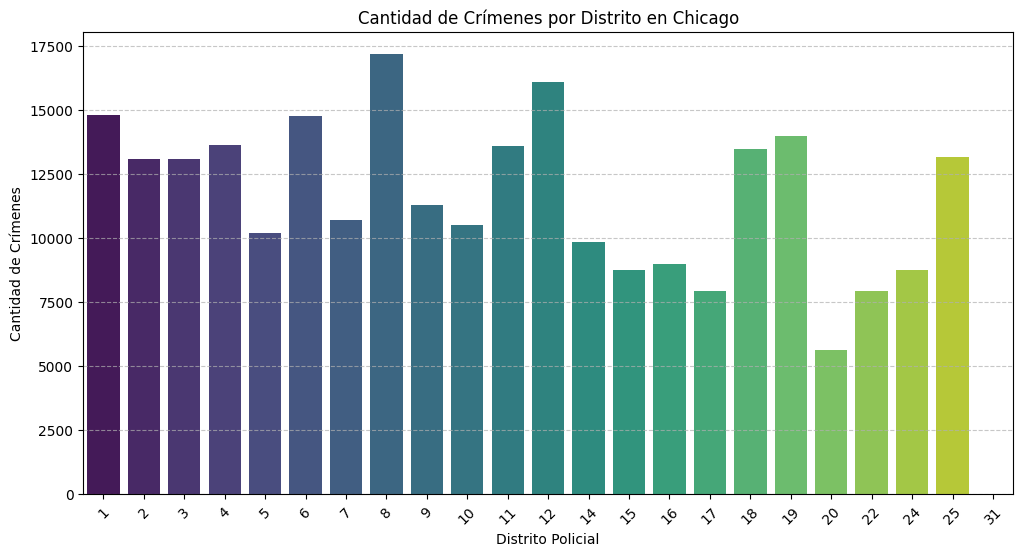

In [ ]:
# ========================================
# Cantidad total de cr√≠menes por distrito
#=========================================
crimenes_por_distrito = df["district"].value_counts().sort_values(ascending=False)

# Gr√°fico de Barras: Distritos con M√°s Cr√≠menes
plt.figure(figsize=(12, 6))
sns.barplot(x=crimenes_por_distrito.index, y=crimenes_por_distrito.values, palette="viridis")

# Personalizar el gr√°fico
plt.title("Cantidad de Cr√≠menes por Distrito en Chicago")
plt.xlabel("Distrito Policial")
plt.ylabel("Cantidad de Cr√≠menes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gr√°fico
plt.show()

## 1. ¬øC√≥mo var√≠a la distribuci√≥n de los cr√≠menes a lo largo de las horas del d√≠a, los d√≠as de la semana y los meses del a√±o?¬øSe observan anomal√≠as y/o patrones estacionales?

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\3086206419.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"], errors='coerce')


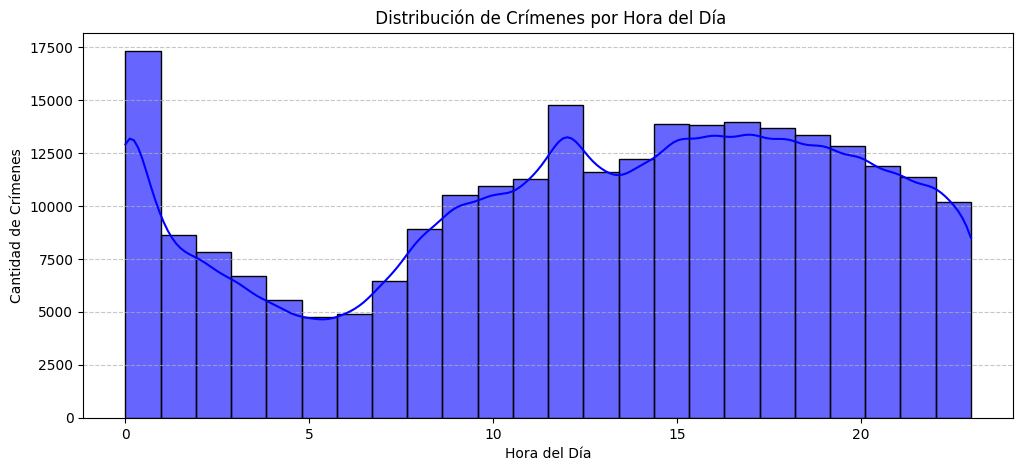

In [ ]:
# Se convierte la fecha en formato datetime
df["date"] = pd.to_datetime(df["date"], errors='coerce')

# Extraer informaci√≥n temporal para el an√°lisis
df["Hora"] = df["date"].dt.hour  # Extraer la hora del crimen
df["D√≠a de la Semana"] = df["date"].dt.day_name()  # Extraer el d√≠a de la semana
df["Mes"] = df["date"].dt.month  # Extraer el mes

# ======================================================
#  Gr√°fico 1: Distribuci√≥n de Cr√≠menes por Hora del D√≠a
# ======================================================
plt.figure(figsize=(12, 5))
sns.histplot(df["Hora"], bins=24, kde=True, color="blue", alpha=0.6)
plt.title(" Distribuci√≥n de Cr√≠menes por Hora del D√≠a")
plt.xlabel("Hora del D√≠a")
plt.ylabel("Cantidad de Cr√≠menes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



###  Variaci√≥n de Cr√≠menes por Hora del D√≠a
Pico de cr√≠menes ocurre a las 00:00 horas (medianoche).
Hay un aumento de cr√≠menes en las noches, lo que sugiere que el crimen es m√°s frecuente en horarios nocturnos.
Madrugada y ma√±ana tienen menos cr√≠menes.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\1992688734.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["D√≠a de la Semana"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")


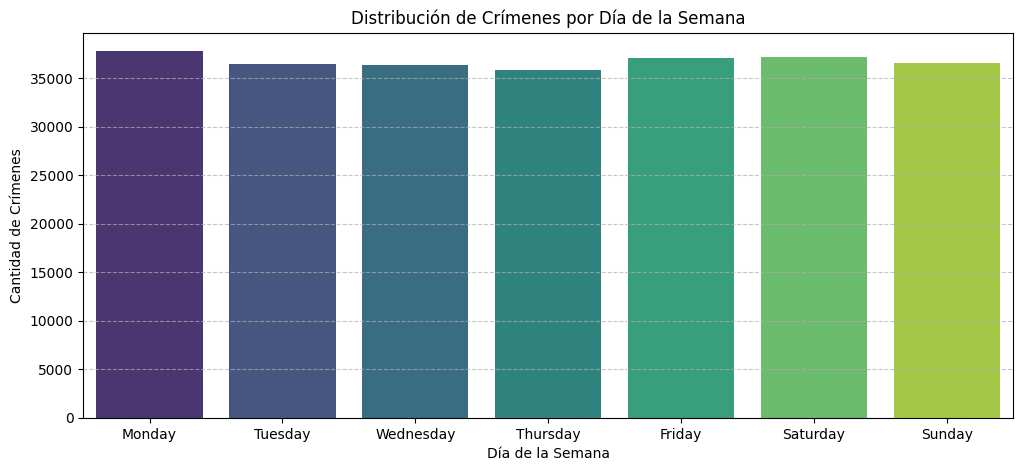

In [ ]:
# ==========================================================
#  Gr√°fico 2: Distribuci√≥n de Cr√≠menes por D√≠a de la Semana
# ==========================================================
plt.figure(figsize=(12, 5))
sns.countplot(x=df["D√≠a de la Semana"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")
plt.title("Distribuci√≥n de Cr√≠menes por D√≠a de la Semana")
plt.xlabel("D√≠a de la Semana")
plt.ylabel("Cantidad de Cr√≠menes")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Variaci√≥n de Cr√≠menes por D√≠a de la Semana
- El lunes es el d√≠a con m√°s cr√≠menes reportados.
- Fines de semana (s√°bado y domingo) no muestran un aumento significativo, lo que contradice la creencia de que los cr√≠menes aumentan esos d√≠as.

C:\Users\Usuario\AppData\Local\Temp\ipykernel_35388\2384464036.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Mes"], palette="magma")


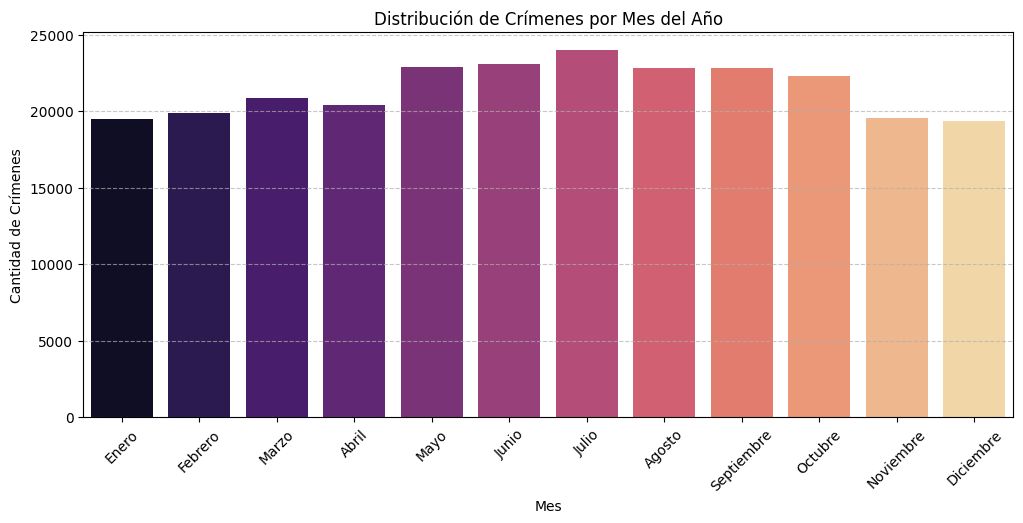

In [ ]:
# ====================================================
# Gr√°fico 3: Distribuci√≥n de Cr√≠menes por Mes del A√±o
# ====================================================
plt.figure(figsize=(12, 5))
sns.countplot(x=df["Mes"], palette="magma")
plt.title("Distribuci√≥n de Cr√≠menes por Mes del A√±o")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Cr√≠menes")
plt.xticks(range(0, 12), ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Variaci√≥n de Cr√≠menes por Mes del A√±o
- Julio es el mes con m√°s cr√≠menes reportados.
- Se observa un aumento de cr√≠menes en verano (junio-julio-agosto), lo que puede estar relacionado con el aumento de actividades al aire libre y mayor movilidad de las personas.

In [ ]:
# ==================================================================================================================
# An√°lisis de Anomal√≠as y Patrones Estacionales
# Se proceden a calcular la Moda, Media, Mediana, Percentiles y Desviacion Estandar para la hora, dia y mes del a√±o
# ==================================================================================================================
hora_pico = df["Hora"].mode()[0]  # Hora con m√°s cr√≠menes
media_hora = df["Hora"].mean()
mediana_hora = df["Hora"].median()
percentiles_hora = df["Hora"].quantile([0.25, 0.50, 0.75])
std_hora = df["Hora"].std()

# Media y Mediana de los cr√≠menes por d√≠a de la semana (convirtiendo a n√∫meros)
dias_semana_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["Dia_Num"] = df["D√≠a de la Semana"].apply(lambda x: dias_semana_ordenados.index(x) if x in dias_semana_ordenados else None)

dia_pico = df["D√≠a de la Semana"].mode()[0]  # D√≠a con m√°s cr√≠menes
media_dia = df["Dia_Num"].mean()
mediana_dia = df["Dia_Num"].median()
percentiles_dia = df["Dia_Num"].quantile([0.25, 0.50, 0.75])
std_dia = df["Dia_Num"].std()

mes_pico = df["Mes"].mode()[0]  # Mes con m√°s cr√≠menes
media_mes = df["Mes"].mean()
mediana_mes = df["Mes"].median()
percentiles_mes = df["Mes"].quantile([0.25, 0.50, 0.75])
std_mes = df["Mes"].std()

# Convertir el n√∫mero del d√≠a y mes a su nombre correspondiente
nombre_mediana_dia = dias_semana_ordenados[int(mediana_dia)]
nombre_mediana_mes = calendar.month_name[int(mediana_mes)]
# Obtener el nombre del mes
nombre_mes_pico = calendar.month_name[mes_pico]

print("\n--=== An√°lisis de Anomal√≠as y Patrones Estacionales ===--\n")

# An√°lisis por Hora
print("** Distribuci√≥n de Cr√≠menes por Hora del D√≠a **")
print(f"Hora con m√°s cr√≠menes (Moda): {hora_pico}:00 hrs")
print(f"Hora promedio de cr√≠menes (Media): {media_hora:.2f} hrs")
print(f"Hora central de cr√≠menes (Mediana): {mediana_hora:.2f} hrs")
print(f"Desviaci√≥n est√°ndar: {std_hora:.2f} hrs")
print(f"Percentiles: 25%={percentiles_hora[0.25]:.2f}, 50%={percentiles_hora[0.50]:.2f}, 75%={percentiles_hora[0.75]:.2f}\n")

# An√°lisis por D√≠a de la Semana
print("** Distribuci√≥n de Cr√≠menes por D√≠a de la Semana **")
print(f"D√≠a con m√°s cr√≠menes (Moda): {dia_pico}")
print(f"D√≠a promedio de cr√≠menes (Media): {dias_semana_ordenados[int(media_dia)]}")
print(f"D√≠a central de cr√≠menes (Mediana): {nombre_mediana_dia}")
print(f"Desviaci√≥n est√°ndar: {std_dia:.2f} d√≠as")
print(f"Percentiles: 25%={dias_semana_ordenados[int(percentiles_dia[0.25])]}, 50%={dias_semana_ordenados[int(percentiles_dia[0.50])]}, 75%={dias_semana_ordenados[int(percentiles_dia[0.75])]}\n")

# An√°lisis por Mes
print("**Distribuci√≥n de Cr√≠menes por Mes del A√±o **")
print(f"Mes con m√°s cr√≠menes (Moda): {nombre_mes_pico}")
print(f"Mes promedio de cr√≠menes (Media): {calendar.month_name[int(media_mes)]}")
print(f"Mes central de cr√≠menes (Mediana): {nombre_mediana_mes}")
print(f"Desviaci√≥n est√°ndar: {std_mes:.2f} meses")
print(f"Percentiles: 25%={calendar.month_name[int(percentiles_mes[0.25])]}, 50%={calendar.month_name[int(percentiles_mes[0.50])]}, 75%={calendar.month_name[int(percentiles_mes[0.75])]}")


--=== An√°lisis de Anomal√≠as y Patrones Estacionales ===--

** Distribuci√≥n de Cr√≠menes por Hora del D√≠a **
Hora con m√°s cr√≠menes (Moda): 0:00 hrs
Hora promedio de cr√≠menes (Media): 12.52 hrs
Hora central de cr√≠menes (Mediana): 13.00 hrs
Desviaci√≥n est√°ndar: 6.85 hrs
Percentiles: 25%=8.00, 50%=13.00, 75%=18.00

** Distribuci√≥n de Cr√≠menes por D√≠a de la Semana **
D√≠a con m√°s cr√≠menes (Moda): Monday
D√≠a promedio de cr√≠menes (Media): Wednesday
D√≠a central de cr√≠menes (Mediana): Thursday
Desviaci√≥n est√°ndar: 2.01 d√≠as
Percentiles: 25%=Tuesday, 50%=Thursday, 75%=Saturday

* *Distribuci√≥n de Cr√≠menes por Mes del A√±o **
Mes con m√°s cr√≠menes (Moda): July
Mes promedio de cr√≠menes (Media): June
Mes central de cr√≠menes (Mediana): July
Desviaci√≥n est√°ndar: 3.35 meses
Percentiles: 25%=April, 50%=July, 75%=September


#  An√°lisis de Anomal√≠as y Patrones Estacionales

## üïí Distribuci√≥n de Cr√≠menes por Hora del D√≠a
- **Moda:** `00:00 hrs` ‚Üí Hora con m√°s cr√≠menes.
- **Media:** `12:52 hrs` ‚Üí Promedio de la hora del crimen.
- **Mediana:** `13:00 hrs` ‚Üí Hora central del crimen.
- **Desviaci√≥n est√°ndar:** `6.85 hrs` ‚Üí Los cr√≠menes est√°n bastante dispersos a lo largo del d√≠a.
- **Percentiles:**
  - üîπ **25%** de los cr√≠menes ocurren antes de las `08:00 hrs`.
  - üîπ **50%** ocurren antes de las `13:00 hrs` (**Mediana**).
  - üîπ **75%** ocurren antes de las `18:00 hrs`.

‚úîÔ∏è **Conclusi√≥n:** Aunque el **pico** es a medianoche, la mayor concentraci√≥n de cr√≠menes ocurre entre **mediod√≠a y las 6 PM**.

---

## üóì Distribuci√≥n de Cr√≠menes por D√≠a de la Semana
- **Moda:** `Monday (Lunes)` ‚Üí D√≠a con m√°s cr√≠menes.
- **Media:** `Wednesday (Mi√©rcoles)` ‚Üí Promedio del d√≠a con cr√≠menes.
- **Mediana:** `Thursday (Jueves)` ‚Üí D√≠a central en la distribuci√≥n.
- **Desviaci√≥n est√°ndar:** `2.01 d√≠as` ‚Üí Los cr√≠menes est√°n distribuidos de manera amplia en la semana.
- **Percentiles:**
  - üîπ **25%** de los cr√≠menes ocurren antes del `martes`.
  - üîπ **50%** ocurren antes del `jueves` (**Mediana**).
  - üîπ **75%** ocurren antes del `s√°bado`.

‚úîÔ∏è **Conclusi√≥n:** Aunque los **lunes** tienen m√°s cr√≠menes, la actividad criminal se mantiene **estable durante toda la semana**, con un **peque√±o pico en jueves**.

---

## üìÖ Distribuci√≥n de Cr√≠menes por Mes del A√±o
- **Moda:** `July (Julio)` ‚Üí Mes con m√°s cr√≠menes.
- **Media:** `June (Junio)` ‚Üí Promedio de los cr√≠menes por mes.
- **Mediana:** `July (Julio)` ‚Üí Mes central en la distribuci√≥n.
- **Desviaci√≥n est√°ndar:** `3.35 meses` ‚Üí Los cr√≠menes est√°n distribuidos a lo largo del a√±o, pero con una **tendencia fuerte en verano**.
- **Percentiles:**
  - üîπ **25%** de los cr√≠menes ocurren antes de `abril`.
  - üîπ **50%** ocurren antes de `julio` (**Mediana**).
  - üîπ **75%** ocurren antes de `septiembre`.

‚úîÔ∏è **Conclusi√≥n:** **Los cr√≠menes aumentan en verano, con julio como el mes m√°s cr√≠tico**, pero hay una **distribuci√≥n gradual durante el a√±o**.